#### Linear Regression
Linear regression model with SGD using numpy

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# the data
x = np.random.uniform(0, 10, size=20)

temp = 1.3*x + 15 + np.random.normal(0, 1, size=20)

In [3]:
def linearReg(x, y):
    
    '''
    length = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    
    # Σx^2, and Σxy respectively.
    sum_x_squared = sum(map(lambda a: a * a, x))
    sum_of_products = sum([x[i] * y[i] for i in range(length)])

    # formula
    a = (sum_of_products - (sum_x * sum_y) / length) / (sum_x_squared - ((sum_x ** 2) / length))
    b = (sum_y - a * sum_x) / length
    return a, b
    '''

In [4]:
W, b = linearReg(x, temp)

def predict(value, W, b):
    #$y = W x + b$
    y = W*value + b
    return y

In [5]:
def lossFunction(vector, W, b):
    prediction = np.empty(len(vector))
    length = len(vector)
    for value in vector:
        np.append(prediction, predict(value, W, b)**2)
    ols = np.sum(np.abs(np.subtract(prediction, vector)))
    return ols/length

In [18]:
def gradientDescent(b_current, W_current, x, y, nSteps, vector):
    new_b_vec = np.empty(len(x))
    new_W_vec = np.empty(len(x))
    loss_vec = np.empty(len(x))
    
    b_gradient = 0
    W_gradient = 0
    n = float(len(x))
    
    #calculating the change for each point. The full interaction its one epoch
    for i in range(0, len(x)):
        b_gradient += - 2 * (y[i] - ((W_current*x[i]) + b_current))
        W_gradient += - 2 * x[i] * (y[i] - ((W_current * x[i]) + b_current))
        
        new_b = b_current - (nSteps * b_gradient)
        new_W = W_current - (nSteps * W_gradient)
        
        localLoss = lossFunction(vector, new_W, new_b)
        
        np.append(new_b_vec, new_b)
        np.append(new_W_vec, new_W)
        np.append(loss_vec, localLoss)
    
    return new_b_vec, new_W_vec, loss_vec

In [19]:
a, b = linearReg(x, temp)

In [20]:
a, b

(1.2410545386433924, 15.167668017557403)

In [21]:
predict(6, W, b)

22.613995249417759

In [22]:
vector = np.random.uniform(0, 10, size=20)

lossFunction(vector, W, b)

3.2204518625023022

In [23]:
b_, W_, loss_ = gradientDescent(a, b, x, temp, 0.001, vector)

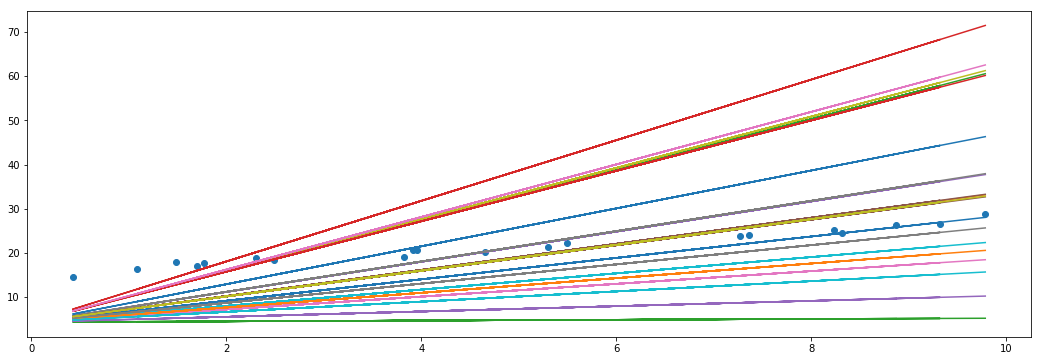

In [24]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(x, temp)

for value in range(0, len(W_)):
    plt.plot(x, W_[value]*x + b_[0], '-')

None

In [25]:
W_

array([ 2.42586894,  2.94777545,  5.75350723,  6.87074979,  3.41795761,
        2.90194564,  1.44570686,  3.43814271,  5.82471663,  1.84315059,
        4.29562232,  1.6614106 ,  0.09012958,  5.712279  ,  0.6035412 ,
        2.95991032,  5.95616959,  2.18192498,  2.91725938,  1.16126882])

In [26]:
W

1.2410545386433924

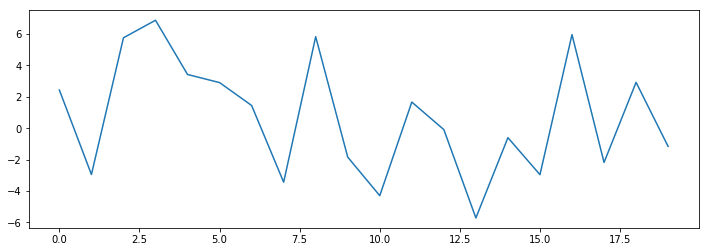

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(loss_)

In [29]:
a = [1,2,3]
b = [2,3,4]
for x, y in zip(a, b):
    print(x,y)

1 2
2 3
3 4
